In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [4]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [5]:
data['Time'] = pd.to_datetime(data['Time'])
data['Date'] = data['Time'].dt.date
daily_totals = data.groupby('Date')['Total'].sum().reset_index()

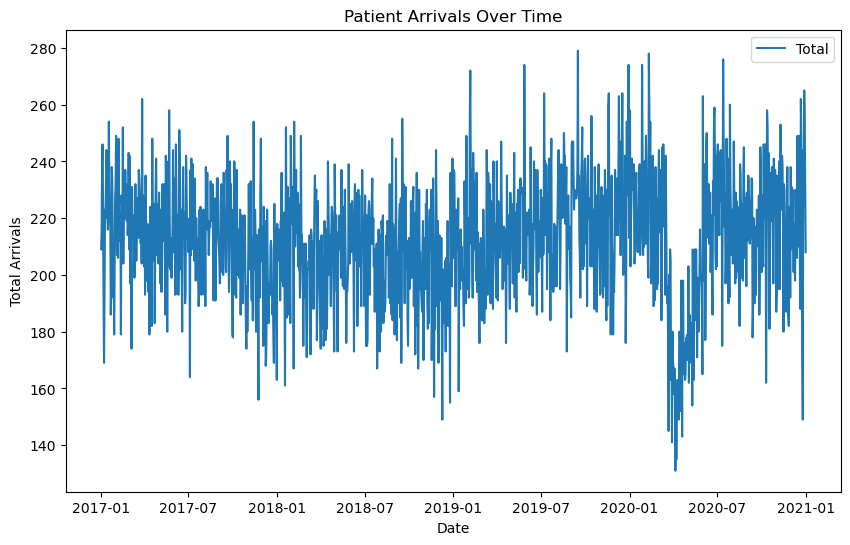

In [6]:
daily_totals.plot(x='Date', y='Total', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrivals')
plt.show()

In [7]:
train_size = int(len(daily_totals) * 0.9)  
train, test = daily_totals.iloc[:train_size], daily_totals.iloc[train_size:]

In [8]:
model = auto_arima(train['Total'], seasonal=False, max_p=5, max_d=2, max_q=5, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train['Total'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=11481.486, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17809.908, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16201.973, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=11493.780, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11497.285, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=11482.930, Time=0.80 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=11482.826, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11509.756, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=11487.157, Time=0.49 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=11511.775, Time=1.00 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11527.453, Time=1.06 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 6.762 seconds


ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [10]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    225.735512
1315    220.421017
1316    224.164994
1317    221.501153
1318    223.370101
           ...    
1456    221.349949
1457    221.340974
1458    221.331999
1459    221.323024
1460    221.314050
Length: 147, dtype: float64


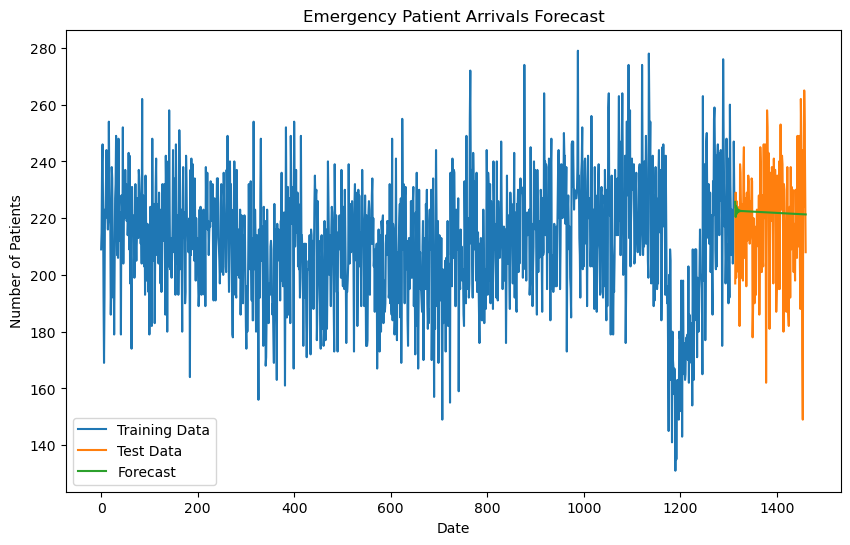

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total'], label='Training Data')
plt.plot(test.index, test['Total'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [12]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [13]:
mape = mean_absolute_percentage_error(test['Total'], forecast_values)
print("MAPE:", mape)

MAPE: 7.879579155592078


In [14]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [15]:
rmse = root_mean_squared_error(test['Total'], forecast_values)
print("RMSE:", rmse)

RMSE: 20.893986229518376


In [16]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['Total'], forecast_values)
print("MAE:", mae)

MAE: 16.356899211298135
